# The importance of context: 
## How process behavior charts imbue meaning
The following code generates the figures found in the essay *The importance of context: How process behavior charts imbue meaning*. The essay can be found [here](https://static1.squarespace.com/static/5b722db6f2e6b1ad5053391b/t/67a61713095e3d696e01d614/1738938132289/The+importance+of+context.pdf).

Figure 5 is generated using the Python package `process_improvement.py`. This package can be found [here](https://pypi.org/project/process-improvement/). Package can be installed using `pip install process-improvement`.

In [30]:
# Import libraries
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# Figure 5 is generated using xmr.xmrchart()
from process_improvement import xmr_charts as xmr

In [2]:
dataset_url = 'https://raw.githubusercontent.com/jimlehner/datasets/refs/heads/main/sales_data.csv'

# Get data
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data()
df.head()

,Month,Sales,mR
0,Jan,10.7,NaN
1,Feb,13.0,2.3
2,Mar,11.4,1.6
3,Apr,11.5,0.1
4,May,12.5,1.0


In [3]:
# Make 'Month' column astype string
df['Month'] = df['Month'].astype('string')
df.dtypes

Month     string
Sales    float64
mR       float64
dtype: object

In order to use the `xmrchart` function in `process_improvement.py`, the *Month* column must be a `string`.

## Fig 1: Scatter plot of sales in Nov

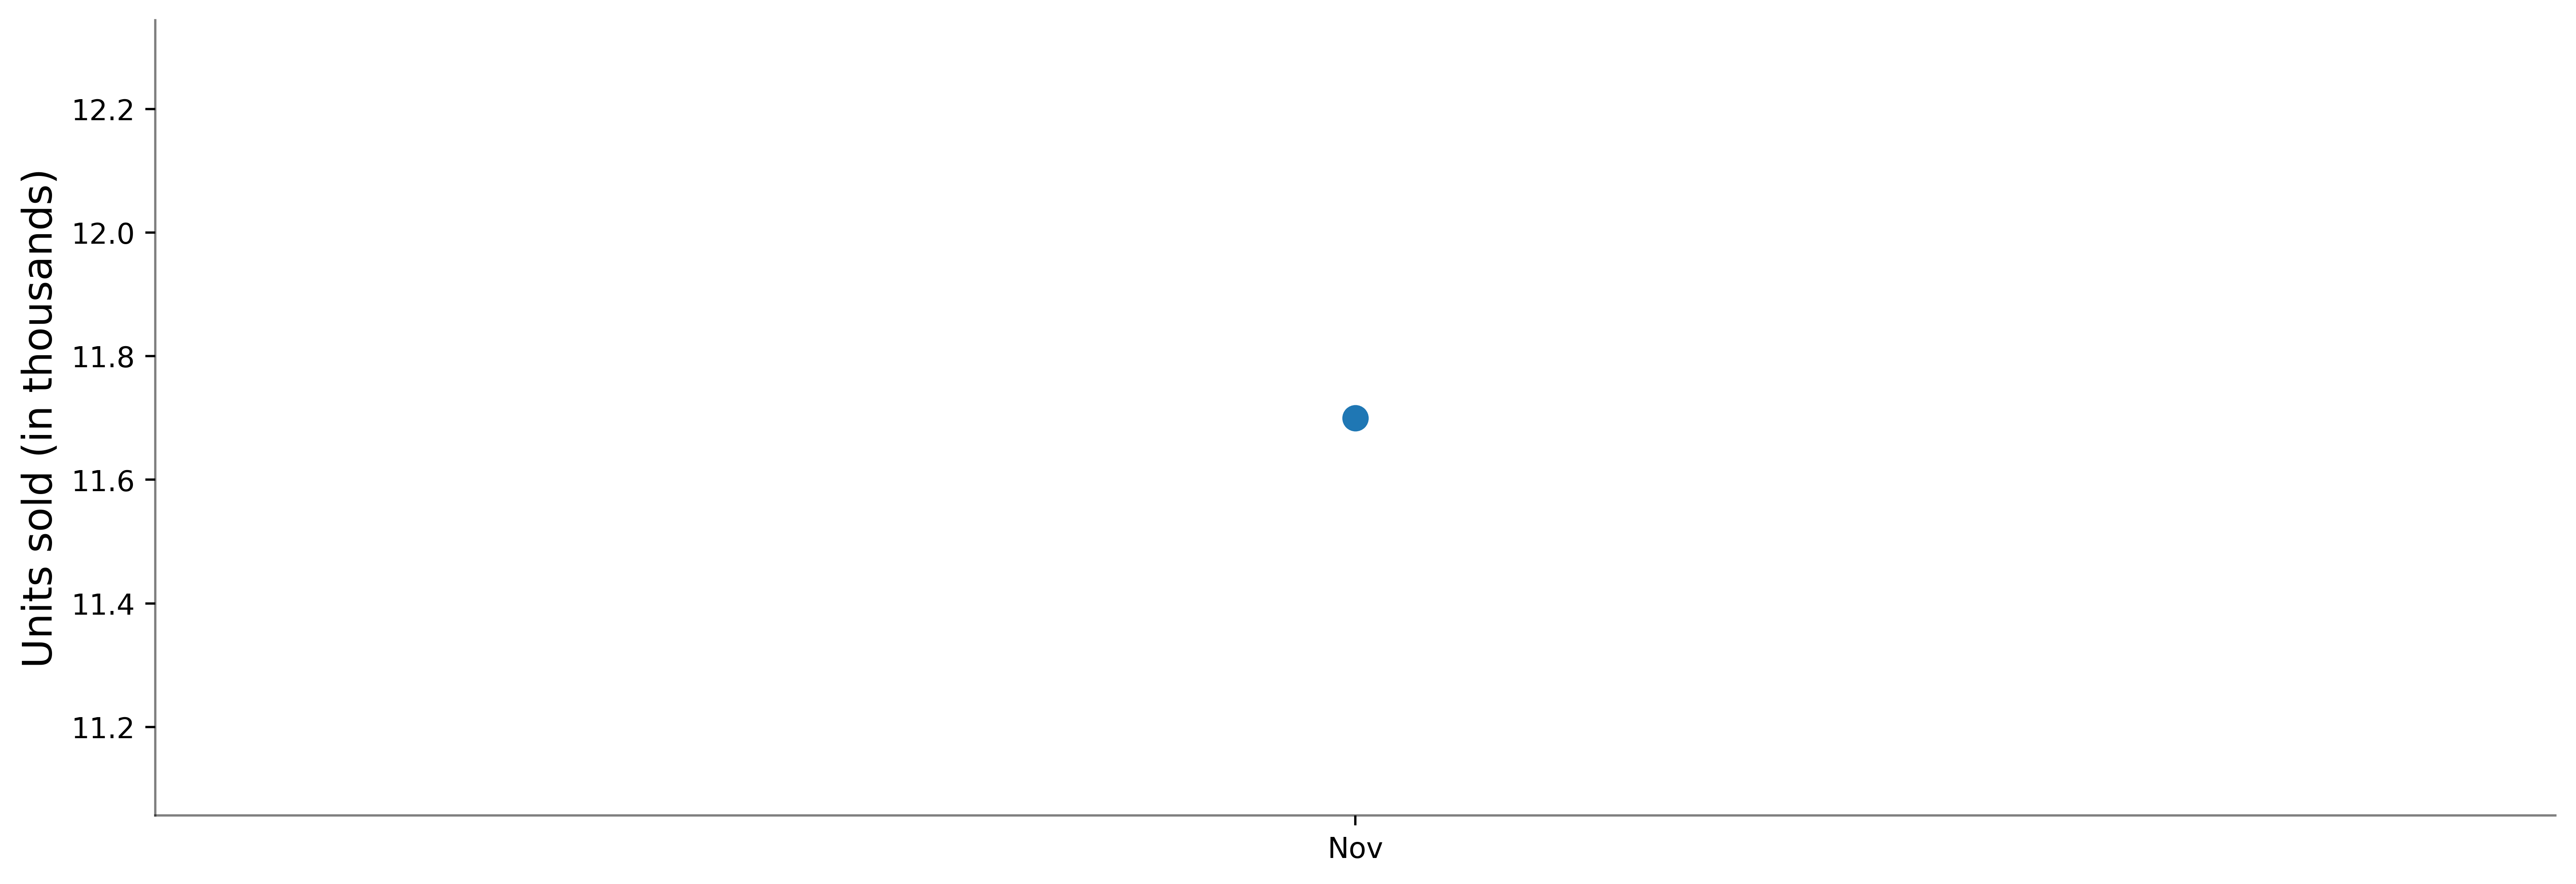

In [14]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(15,5), dpi=500)

# Plot November data
sns.scatterplot(x=[df['Month'].loc[10]],
               y=[df['Sales'].loc[10]],
               s=100)

# Specify x and y axis labels
ax.set_xlabel('')
ax.set_ylabel('Units sold (in thousands)', fontsize=14)

# Remove upper and right spines
sns.despine()
# Set alpha of left and bottom spines
ax.spines[['left','bottom']].set_alpha(0.5)

# Show plot
plt.show()

## Fig 2: Time series of sales in Nov & Dec

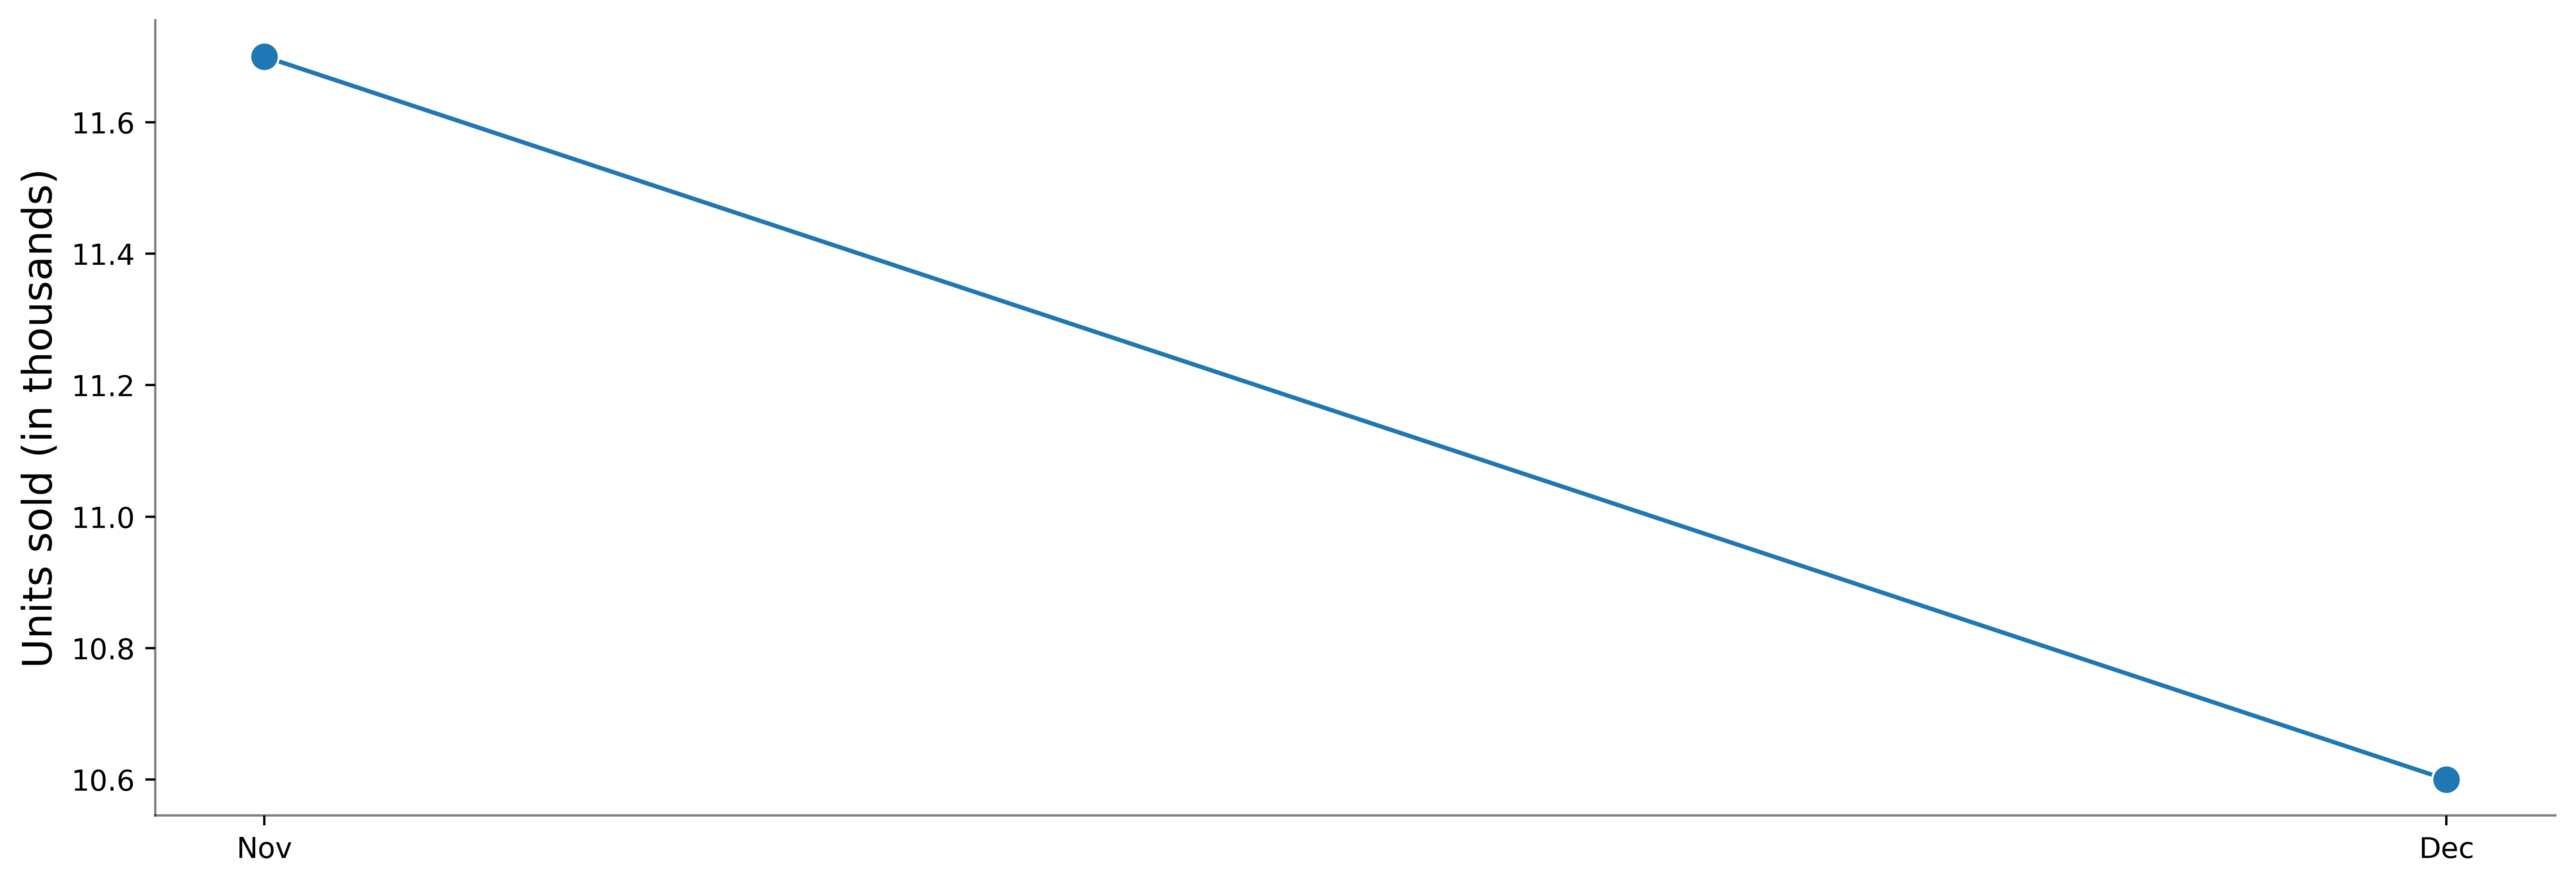

In [15]:
# Filter data to just November and December
filtered_df = df[df['Month'].isin(['Nov', 'Dec'])]

# Create figure and axis
fig, ax = plt.subplots(figsize=(15,5), dpi=500)

# Plot data
sns.lineplot(filtered_df, y='Sales', x='Month', marker='o', markersize=10)

# Despine top and right spines
sns.despine()
# Set alpha for left and bottom spines
ax.spines[['left','bottom']].set_alpha(0.5)

# Set x and y axis labels
ax.set_xlabel('')
ax.set_ylabel('Units sold (in thousands)', fontsize=14)

plt.show()

## Fig 3: Time series of sales data from Jan to Dec

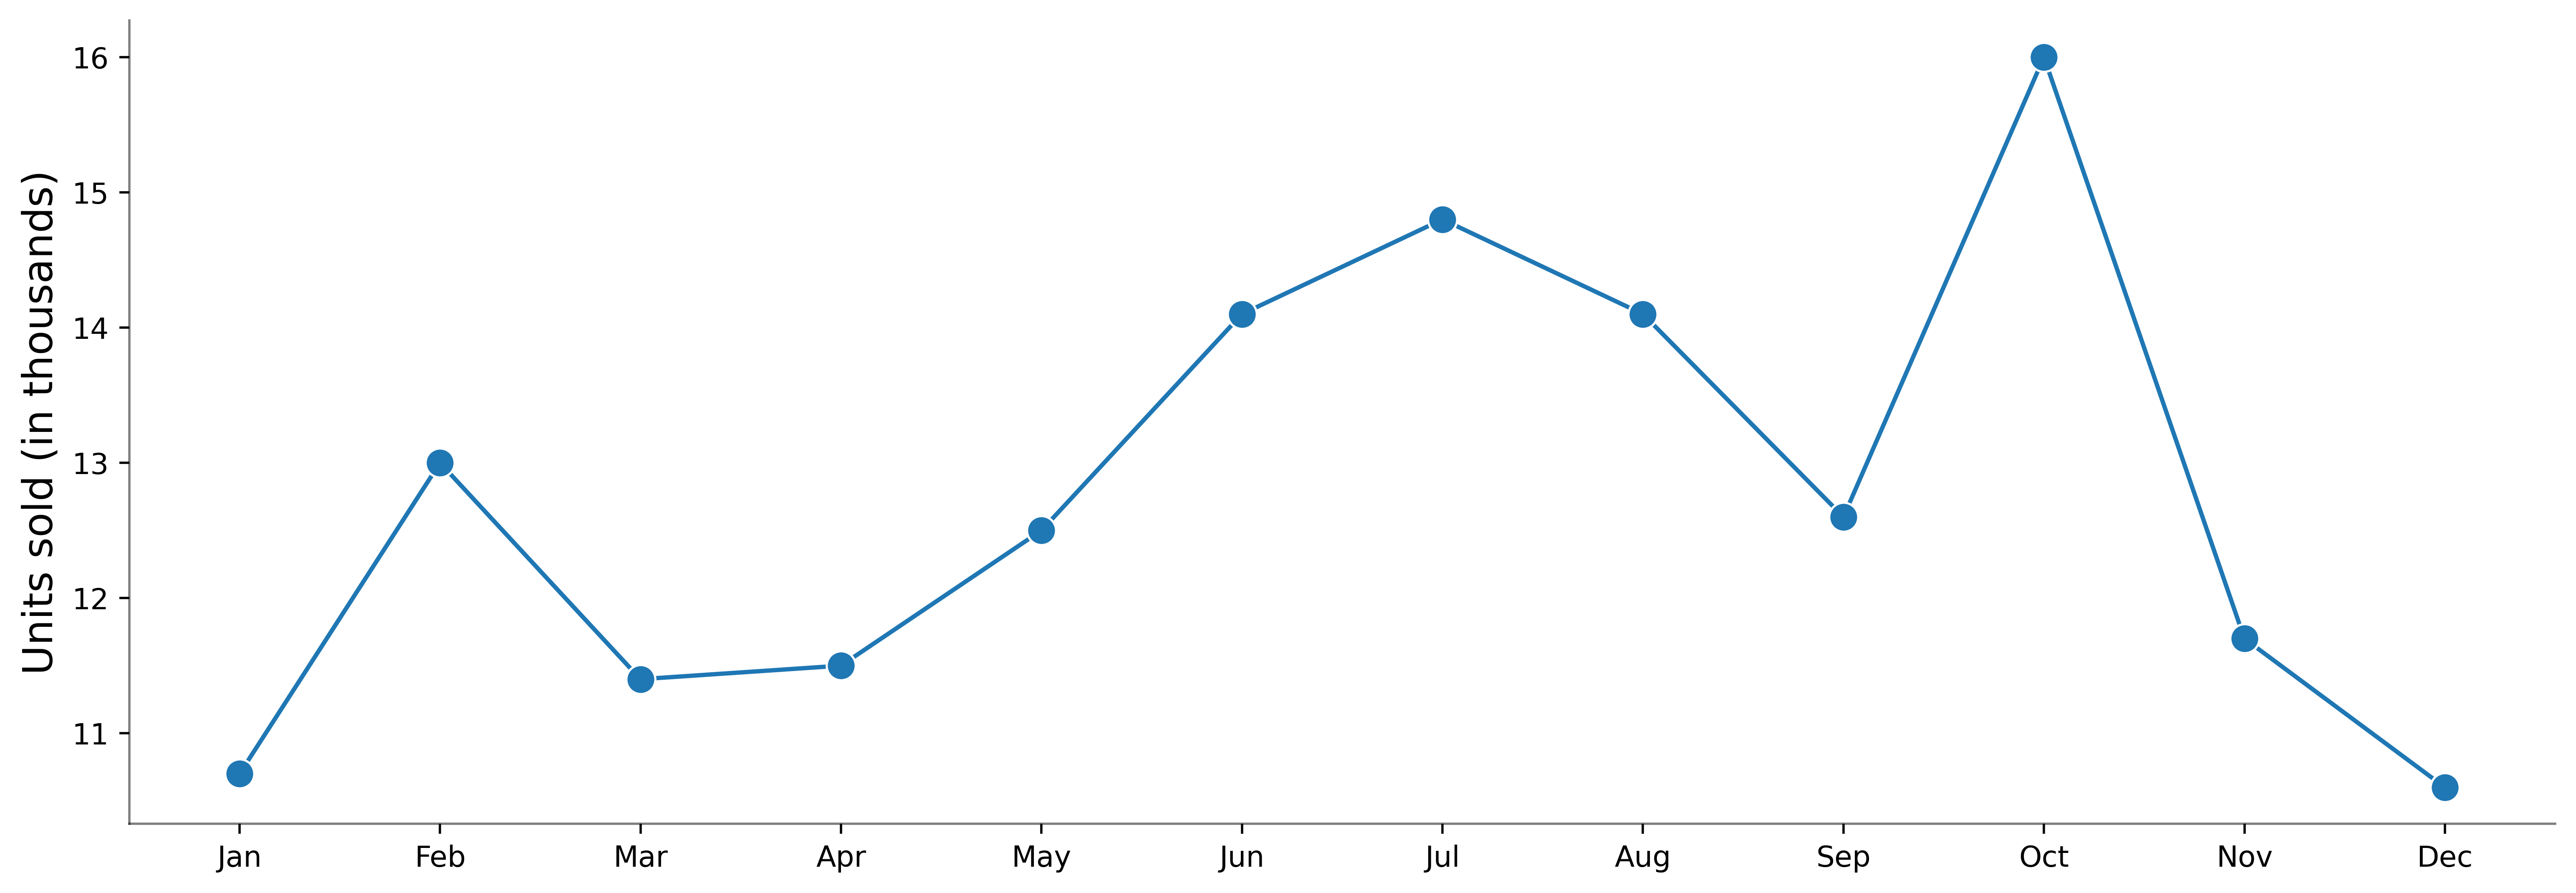

In [16]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(15,5), dpi=500)

# Plot data
sns.lineplot(df, y='Sales', x='Month', marker='o', markersize=10)

# Despine top and right spines
sns.despine()
# Set alpha for left and bottom spines
ax.spines[['left','bottom']].set_alpha(0.5)

# Set x and y axis labels
ax.set_xlabel('')
ax.set_ylabel('Units sold (in thousands)', fontsize=14)

# Show plot
plt.show()

## Fig 4: Time series of sales data with mean

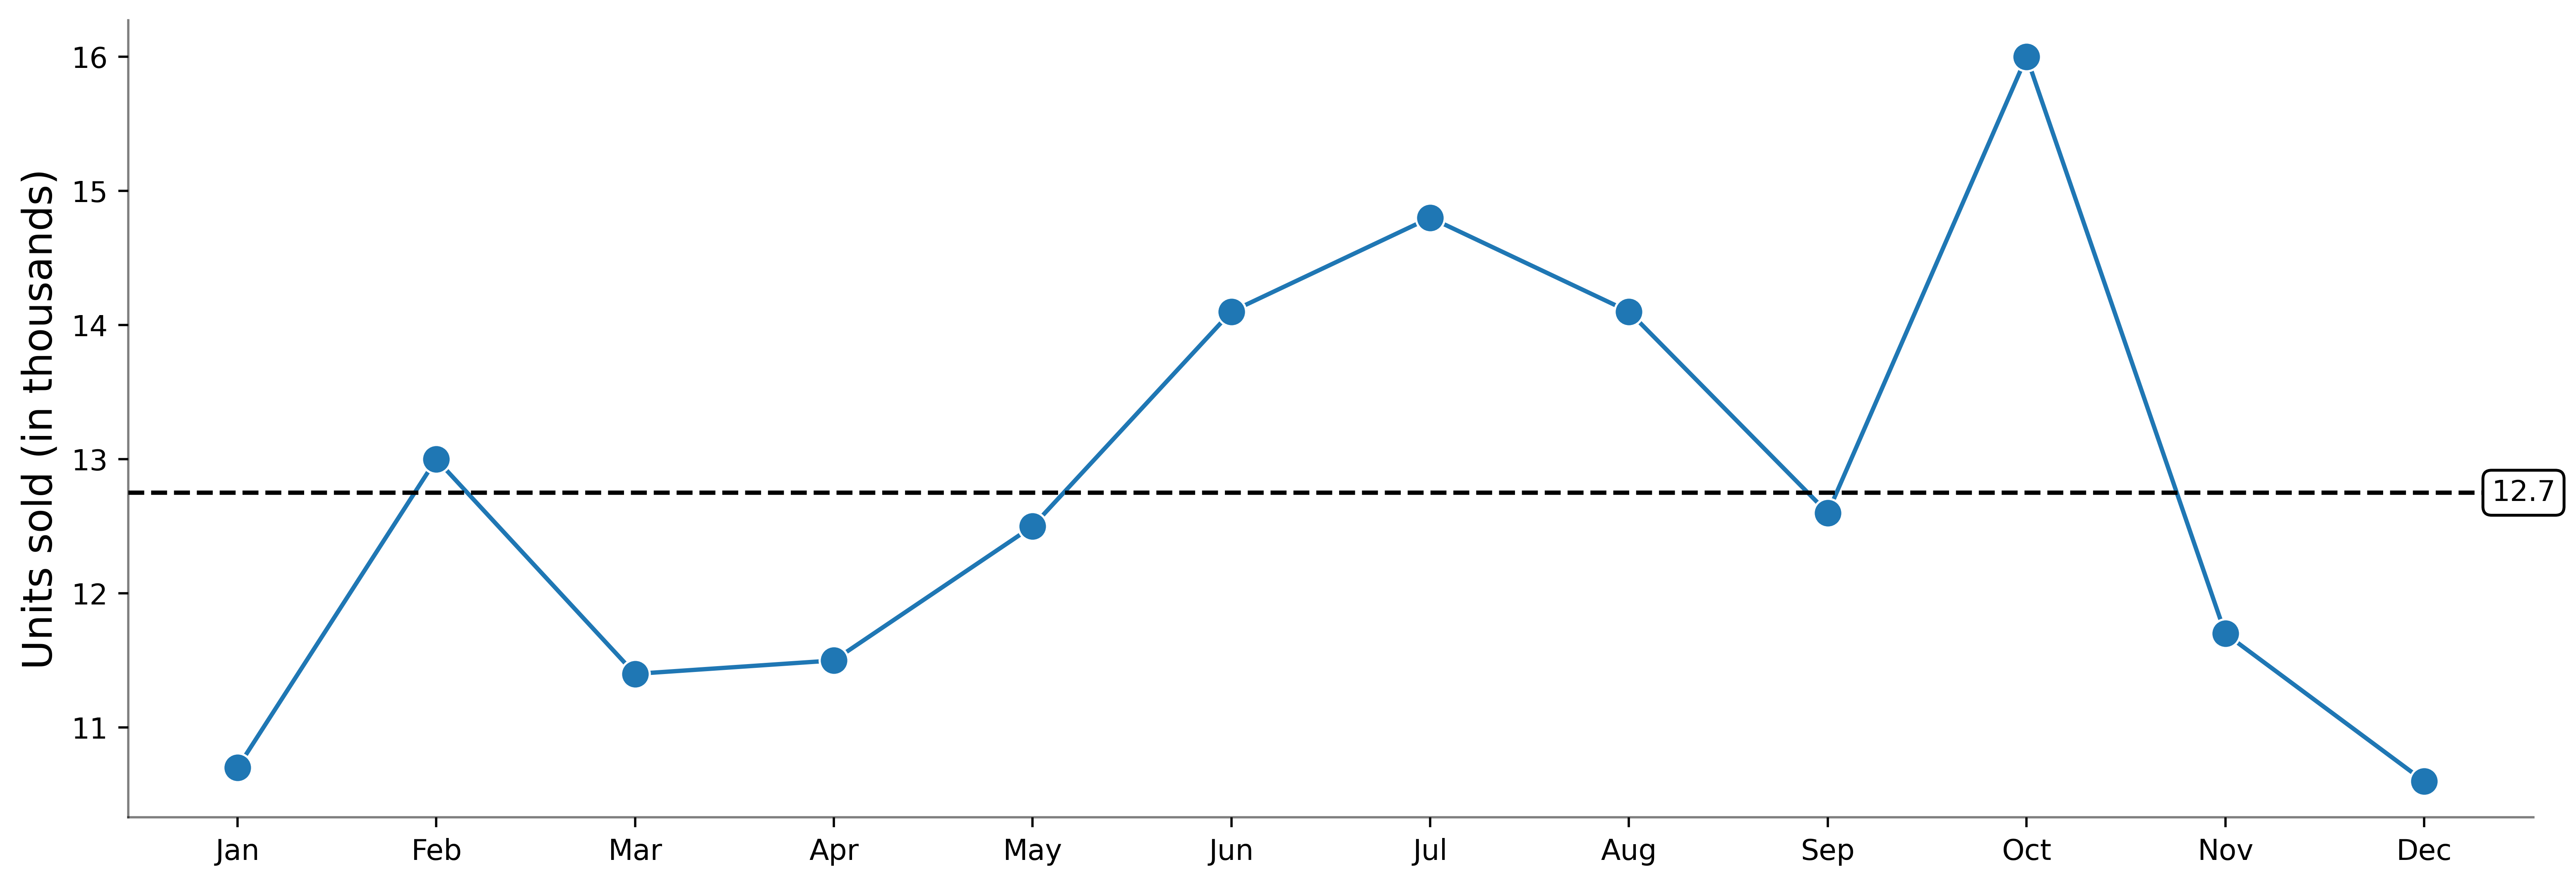

In [18]:
# Calculate the mean
mean = df['Sales'].mean()

# Create figure and axis
fig, ax = plt.subplots(figsize=(15,5), dpi=500)

# Plot data
sns.lineplot(df, y='Sales', x='Month', marker='o', markersize=10)
# Plot horizontal line at mean
ax.axhline(mean, ls='--', c='black')

# Add anootation for mean
ax.annotate(round(mean,1),
           xy=(11.5, mean),
           xytext=(11.5, mean),
           ha='center',
           va='center',
           bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Despine top and right spines
sns.despine()
# Set alpha for left and bottom spines
ax.spines[['left','bottom']].set_alpha(0.5)

# Set x and y axis labels
ax.set_xlabel('')
ax.set_ylabel('Units sold (in thousands)', fontsize=14)

# Show plot
plt.show()

## Fig 5: XmR Chart of sales data using
Figure 5 is generated using the Python package `process_improvement.py`. This package can be found [here](https://pypi.org/project/process-improvement/). Package can be installed using `pip install process-improvement`.

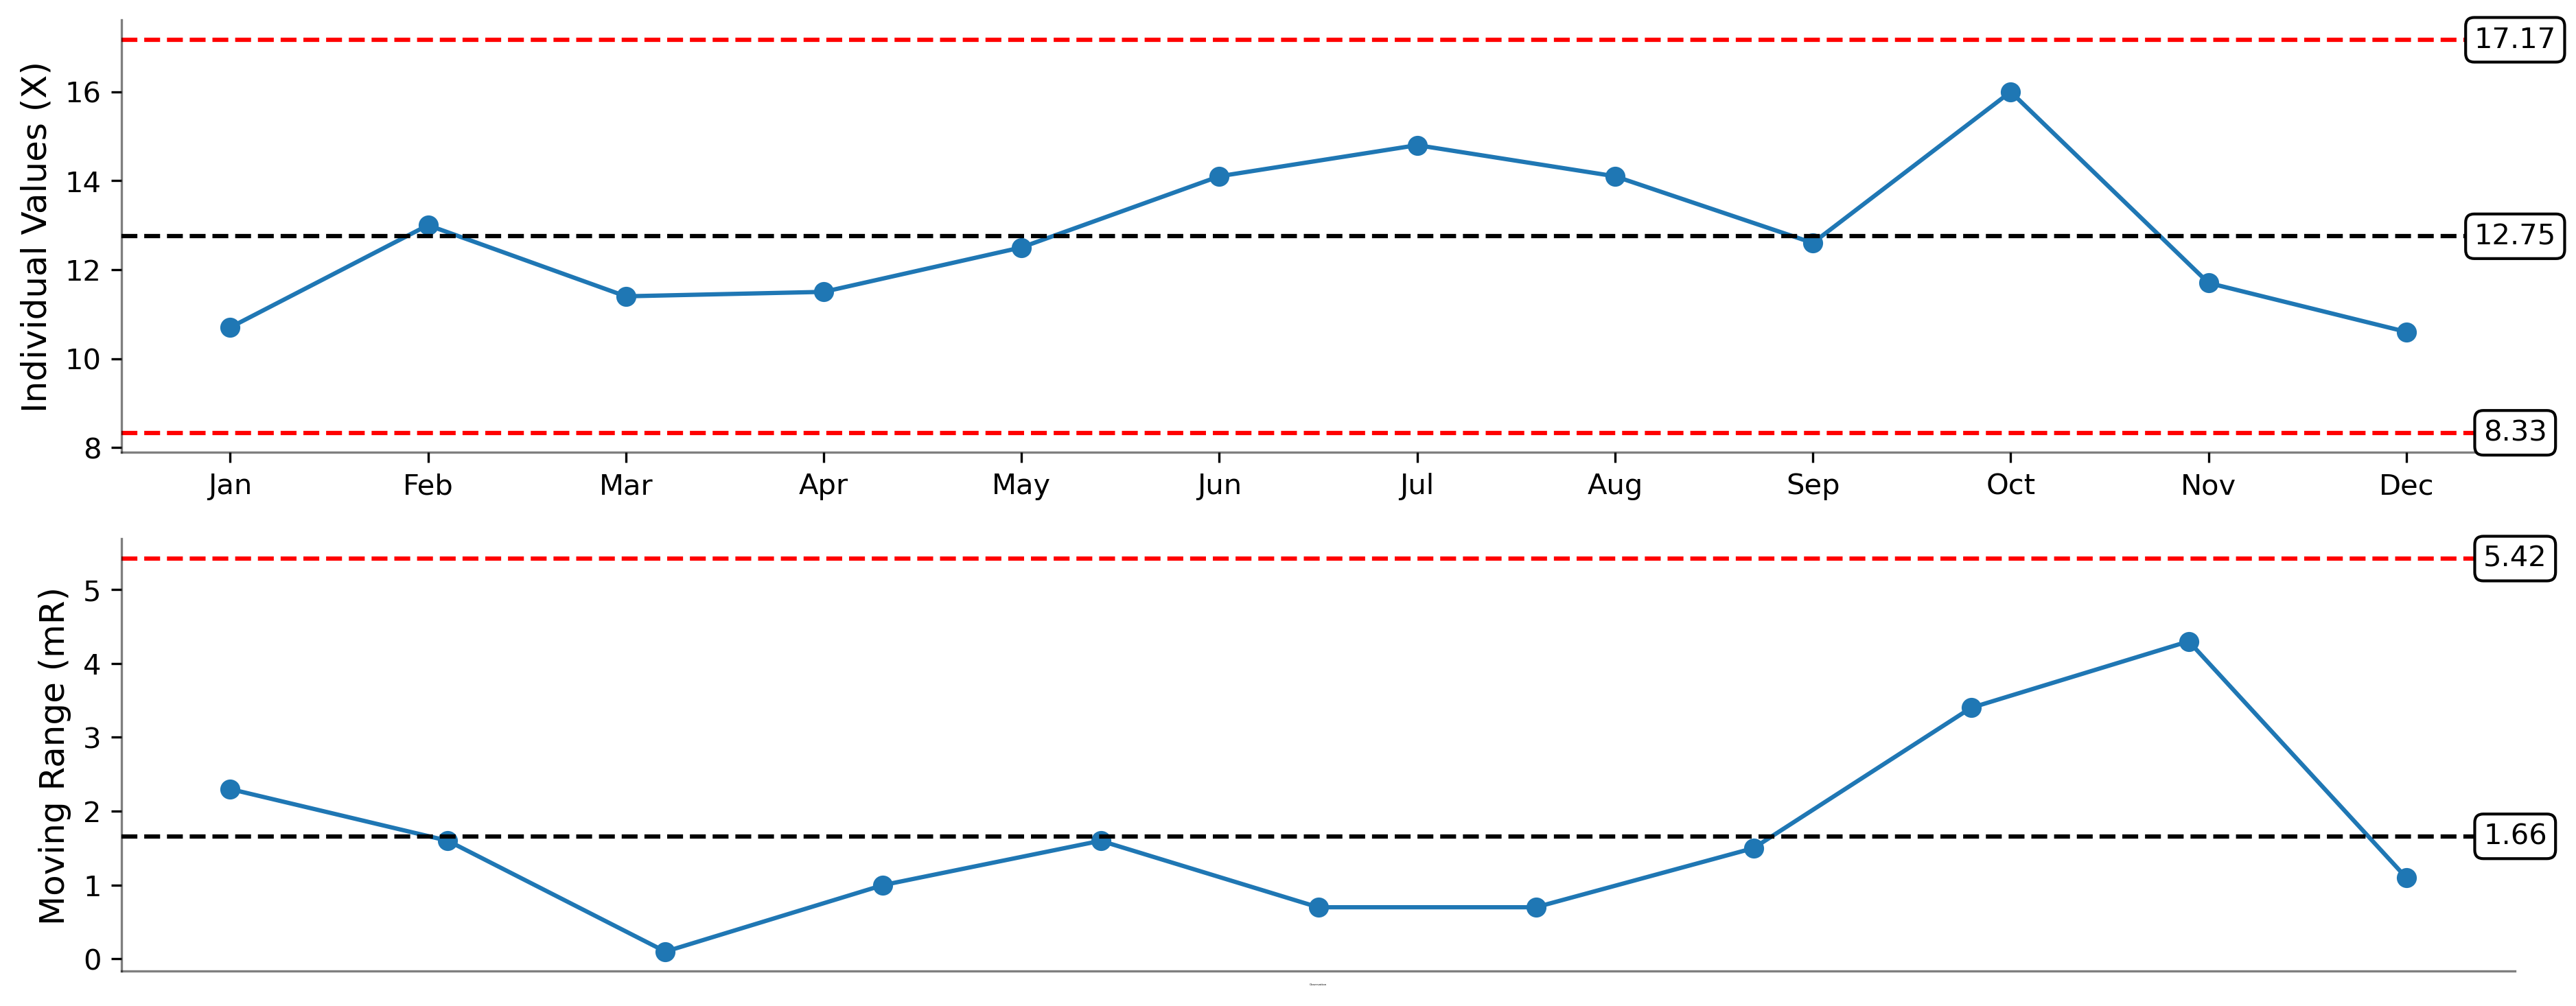

In [23]:
sales_xmr_results = xmr.xmrchart(df, 'Sales', 'Month', tickinterval=1)

In [29]:
# Show summary statstics 
sales_xmr_results['XmR Chart Statistics']

,Chart,PBC Params,Param Values
0,X-Chart,Mean,12.75
1,X-Chart,UPL,17.17
2,X-Chart,LPL,8.33
3,X-Chart,PLR,8.84
4,mR-Chart,Ave. mR,1.66
5,mR-Chart,URL,5.42
